# 🍽️ Zomato Analysis – Customer Preference Intelligence

 This notebook explores customer food preferences using the cleaned Zomato dataset.
 It covers:
 - Top cuisines across restaurants
 - Popular cuisine combinations
 - Chain restaurant analysis
 - Most common customer review sentiments

In [16]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("../data/zomato_cleaned.csv")

# Preview structure
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Cuisine List
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,yes,no,no,No,3,4.8,Dark Green,Excellent,314,"['French', 'Japanese', 'Desserts']"
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,yes,no,no,No,3,4.5,Dark Green,Excellent,591,['Japanese']
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,yes,no,no,No,4,4.4,Green,Very Good,270,"['Seafood', 'Asian', 'Filipino', 'Indian']"
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,no,no,no,No,4,4.9,Dark Green,Excellent,365,"['Japanese', 'Sushi']"
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,yes,no,no,No,4,4.8,Dark Green,Excellent,229,"['Japanese', 'Korean']"


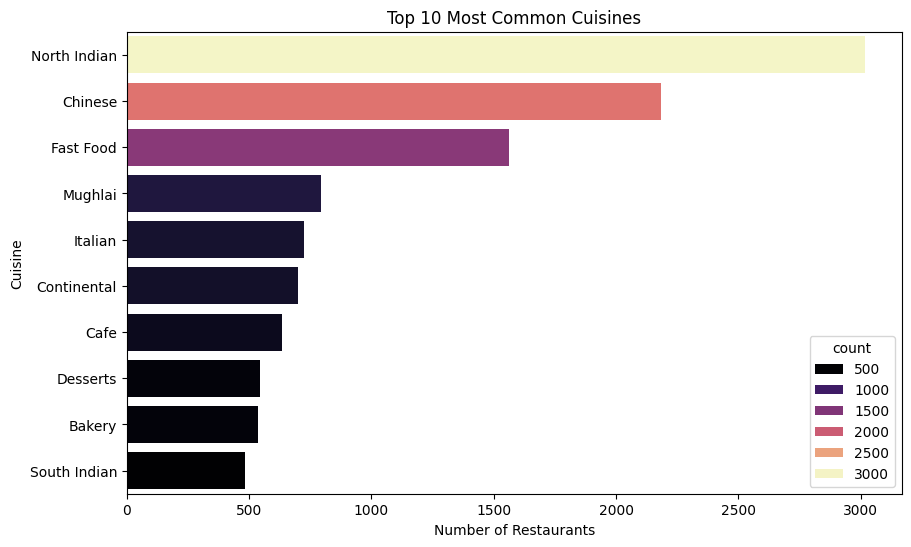

In [15]:
# Flatten cuisine list
df['Cuisine List'] = df['Cuisines'].str.split(', ')
cuisine_list = df['Cuisine List'].explode()
top_cuisines = cuisine_list.value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='magma',hue=top_cuisines)
plt.title("Top 10 Most Common Cuisines")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.show()


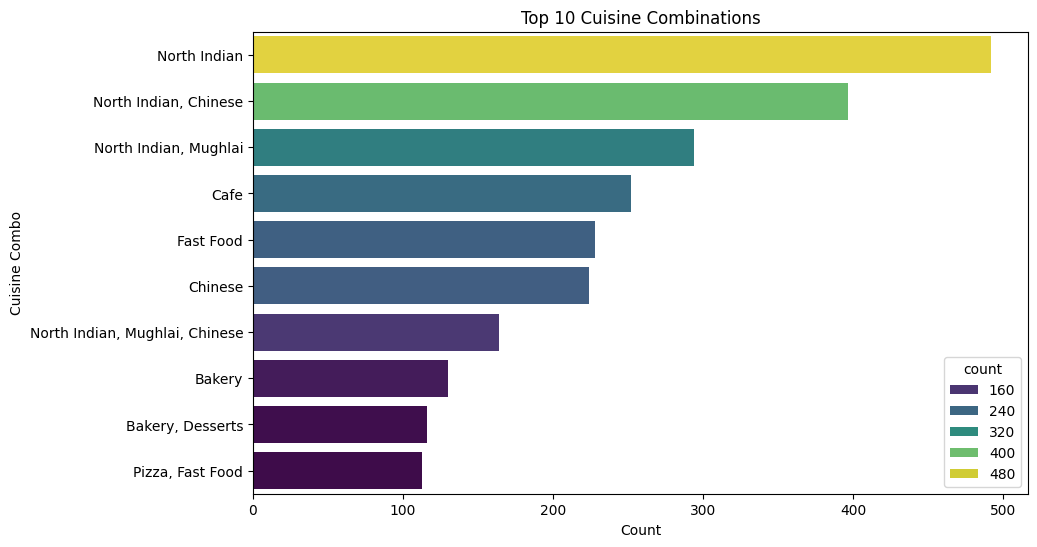

In [14]:
combo_counts = df['Cuisines'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=combo_counts.values, y=combo_counts.index, palette='viridis',hue=combo_counts)
plt.title("Top 10 Cuisine Combinations")
plt.xlabel("Count")
plt.ylabel("Cuisine Combo")
plt.show()


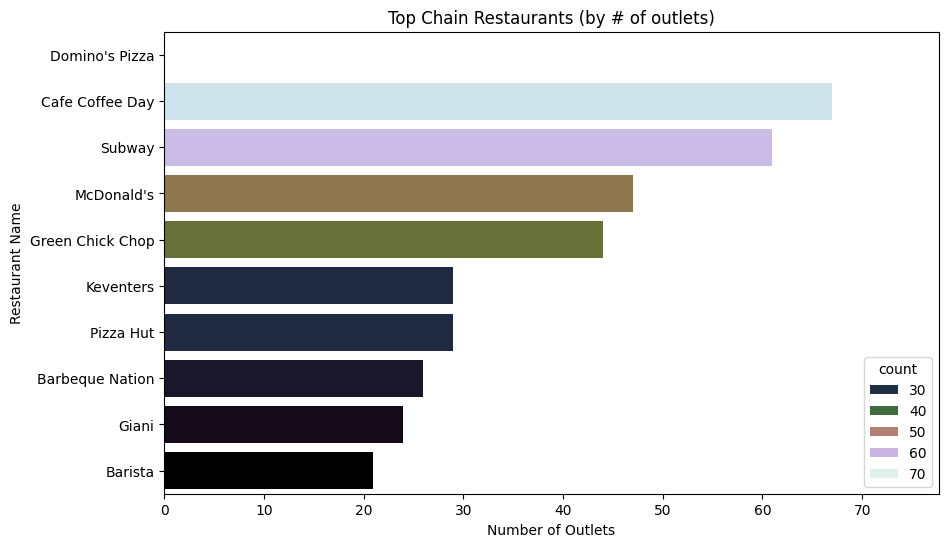

In [13]:
chains = df['Restaurant Name'].value_counts()
top_chains = chains[chains > 5].head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_chains.values, y=top_chains.index, palette='cubehelix',hue=top_chains)
plt.title("Top Chain Restaurants (by # of outlets)")
plt.xlabel("Number of Outlets")
plt.ylabel("Restaurant Name")
plt.show()


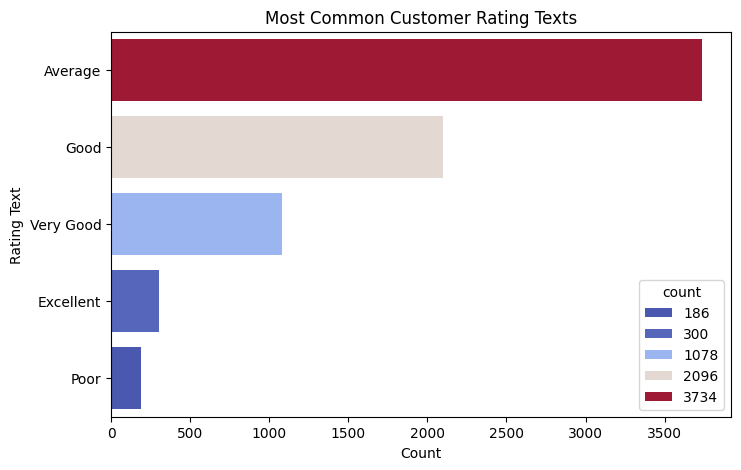

In [12]:
rating_words = df['Rating text'].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=rating_words.values, y=rating_words.index, palette='coolwarm',hue=rating_words)
plt.title("Most Common Customer Rating Texts")
plt.xlabel("Count")
plt.ylabel("Rating Text")
plt.show()


## 🔍 Insights
- North Indian, Chinese, and Fast Food dominate customer preferences.
- Chains like Domino's and McDonald's have a widespread presence.
- Most reviews cluster around “Very Good” and “Excellent” ratings.
